In [32]:
import os
import settings
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc.xls"), encoding="ISO-8859-1")
    return df


In [3]:
df = read_data()

In [38]:
def drop_rows_with_music():
    return df[df['music'] == 0]

In [39]:
df = drop_rows_with_music()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2627
Columns: 155 entries, index to Authority
dtypes: datetime64[ns](2), float64(124), int64(16), object(13)
memory usage: 2.9+ MB


In [41]:
del df['posemo_incr']
del df['negemo_decr']
del df['affect_change']

In [42]:
def calculate_sentiment_change():
    df['posemo_change'] = df['posemo2'] - df['posemo1']
    df['negemo_change'] = df['negemo2'] - df['negemo1']
    df['affect_change'] = df['posemo_change'] + df['negemo_change']
    return df

In [43]:
df = calculate_sentiment_change()

In [44]:
df.head()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,published_date,...,published_dt,published_year,Harm,Fairness,Purity,Ingroup,Authority,posemo_change,negemo_change,affect_change
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1151367060,...,2006-06-27 00:11:00,2006,0.00,0.00,0.03,0.03,0.41,-0.32,-0.89,-1.21
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1151367060,...,2006-06-27 00:11:00,2006,0.00,0.00,0.00,0.55,0.41,-1.90,0.29,-1.61
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1151367060,...,2006-06-27 00:11:00,2006,0.03,0.00,0.09,0.12,0.03,0.02,0.07,0.09
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1151367060,...,2006-06-27 00:11:00,2006,0.29,0.22,0.06,0.96,0.13,0.65,-0.52,0.13
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1151440680,...,2006-06-27 20:38:00,2006,0.00,0.16,0.03,1.04,0.00,1.14,0.25,1.39


In [46]:
df['posemo_change'].describe()

count    2406.000000
mean        0.463350
std         1.111934
min        -7.790000
25%        -0.190000
50%         0.420000
75%         1.100000
max         6.670000
Name: posemo_change, dtype: float64

In [47]:
df['negemo_change'].describe()

count    2406.000000
mean       -0.055732
std         0.920640
min        -4.520000
25%        -0.520000
50%        -0.020000
75%         0.400000
max        14.290000
Name: negemo_change, dtype: float64

In [48]:
df['affect_change'].describe()

count    2406.000000
mean        0.407618
std         1.408368
min       -10.430000
25%        -0.420000
50%         0.340000
75%         1.200000
max        16.080000
Name: affect_change, dtype: float64

In [21]:
def create_published_year():
    df['published_date_dt'] = pd.to_datetime(df['published_date'])
    df['published_dt'] = pd.to_datetime(df['published_date'],unit='s')
    df['published_year'] = df['published_dt'].dt.year
    return df

def create_moral_category_from_subsets():
    df['Harm'] = df['HarmVirtue'] + df['HarmVice']
    df['Fairness'] = df['FairnessVirtue'] + df['FairnessVice']
    df['Purity'] = df['PurityVirtue'] + df['PurityVice']
    df['Ingroup'] = df['IngroupVirtue'] + df['IngroupVice']
    df['Authority'] = df['AuthorityVirtue'] + df['AuthorityVice']
    return df

df = create_published_year()
df = create_moral_category_from_subsets()

In [50]:

df.tail()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,published_date,...,published_dt,published_year,Harm,Fairness,Purity,Ingroup,Authority,posemo_change,negemo_change,affect_change
2623,2623,12,Anna Heringer: The warmth and wisdom of mud bu...,781,TED2017,1492992000,8,Anna Heringer,Anna Heringer: The warmth and wisdom of mud bu...,1506609881,...,2017-09-28 14:44:41,2017,0.17,0.06,0.40,0.23,0.40,-0.48,-0.12,-0.60
2624,2624,21,Julio Gil: Future tech will give you the benef...,667,TED@UPS,1500508800,14,Julio Gil,Julio Gil: Future tech will give you the benef...,1506524207,...,2017-09-27 14:56:47,2017,0.00,0.06,0.00,0.25,0.13,0.00,-0.38,-0.38
2625,2625,19,Nabila Alibhai: Why people of different faiths...,711,TEDGlobal 2017,1503792000,9,Nabila Alibhai,Nabila Alibhai: Why people of different faiths...,1506456019,...,2017-09-26 20:00:19,2017,0.50,0.24,0.31,2.00,0.19,0.16,-1.98,-1.82
2626,2626,22,Mei Lin Neo: The fascinating secret lives of g...,327,TED2017,1492992000,18,Mei Lin Neo,Mei Lin Neo: The fascinating secret lives of g...,1506437715,...,2017-09-26 14:55:15,2017,0.86,0.00,0.00,0.28,0.43,1.74,0.01,1.75
2627,2627,21,Anindya Kundu: The boost students need to over...,425,TED Residency,1496707200,15,Anindya Kundu,Anindya Kundu: The boost students need to over...,1506352216,...,2017-09-25 15:10:16,2017,0.26,0.00,0.00,0.52,0.43,-0.16,-0.68,-0.84


In [59]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

def plot_moral_words_by_year():
    df.groupby('published_year')['MoralityGeneral'].mean().plot()
    plt.show()
    df.groupby('published_year')['Harm'].mean().plot()
    plt.show()
    df.groupby('published_year')['Authority'].mean().plot()
    plt.show()
    df.groupby('published_year')['Fairness'].mean().plot()
    plt.show()
    df.groupby('published_year')['Ingroup'].mean().plot()
    plt.show()
    df.groupby('published_year')['Purity'].mean().plot()
    plt.show()
    # Show correlation matrix of moral category by year
    
    # Show p-value of correlation of moral category by year
    

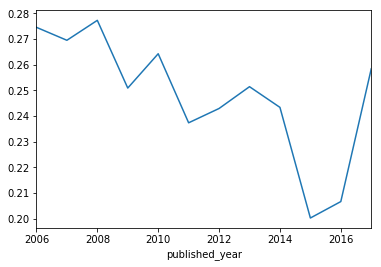

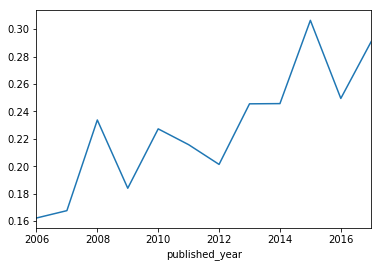

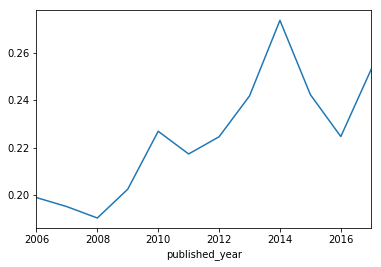

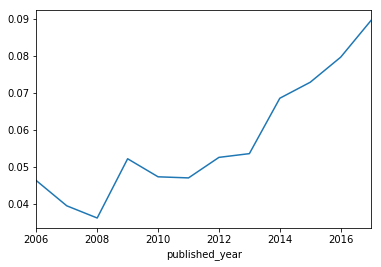

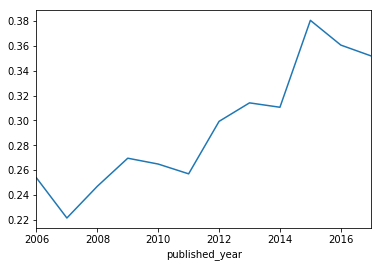

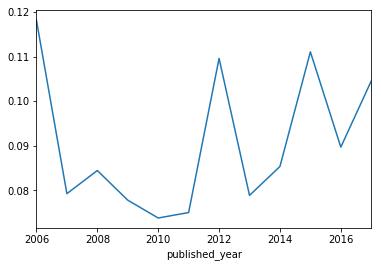

In [60]:
plot_moral_words_by_year()

In [35]:
df[['MoralityGeneral', 'Harm', 'Authority', 'Ingroup', 'Purity', 'Fairness', 'published_date']].corr()

,MoralityGeneral,Harm,Authority,Ingroup,Purity,Fairness,published_date
MoralityGeneral,1.000000,0.065378,0.068348,-0.037941,0.016400,0.123824,-0.052308
Harm,0.065378,1.000000,0.166907,0.216890,0.143721,0.096939,0.105854
Authority,0.068348,0.166907,1.000000,0.217058,-0.011165,0.148562,0.069671
Ingroup,-0.037941,0.216890,0.217058,1.000000,0.038544,0.126757,0.148848
Purity,0.016400,0.143721,-0.011165,0.038544,1.000000,-0.000744,0.034588
Fairness,0.123824,0.096939,0.148562,0.126757,-0.000744,1.000000,0.125746
published_date,-0.052308,0.105854,0.069671,0.148848,0.034588,0.125746,1.000000


In [37]:
moral_df = df[['MoralityGeneral', 'Harm', 'Authority', 'Ingroup', 'Purity', 'Fairness', 'published_date']]
calculate_pvalues(moral_df)

,MoralityGeneral,Harm,Authority,Ingroup,Purity,Fairness,published_date
MoralityGeneral,0,0.0012,0.0007,0.0607,0.4177,0,0.0097
Harm,0.0012,0,0,0,0,0,0
Authority,0.0007,0,0,0,0.5812,0,0.0006
Ingroup,0.0607,0,0,0,0.0568,0,0
Purity,0.4177,0,0.5812,0.0568,0,0.9707,0.0874
Fairness,0,0,0,0,0.9707,0,0
published_date,0.0097,0,0.0006,0,0.0874,0,0


In [ ]:
def normalize(x, label):
    return x.count(term)

In [62]:
df['norm_persuasive'] = df['persuasive'] / df['views']

In [63]:
df['norm_persuasive'].describe()

count    2406.000000
mean        0.000137
std         0.000167
min         0.000000
25%         0.000038
50%         0.000091
75%         0.000180
max         0.002759
Name: norm_persuasive, dtype: float64

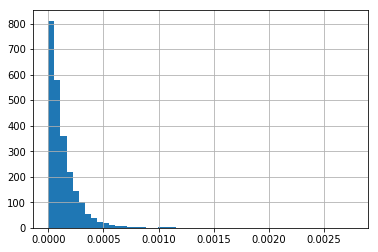

In [67]:
df['norm_persuasive'].hist(bins=50)

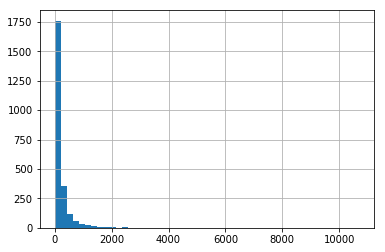

In [72]:
df['persuasive'].hist(bins=50)